<a href="https://colab.research.google.com/github/AlexMa123/BIU-ComplexSystem/blob/main/CentralLimited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
dists = {
    "norm": lambda size: stats.norm(0, 1).rvs(size),
    "uniform": lambda size: stats.uniform(loc=-0.5).rvs(size),
    "delta": lambda size: np.random.choice([-1, 1], size=size),
    "exp": lambda size: stats.expon().rvs(size),
    "cauchy": lambda size: stats.cauchy().rvs(size), # Can't be fitted by a normal distribution
    "parto": lambda alpha, size: stats.pareto(alpha).rvs(size),
}


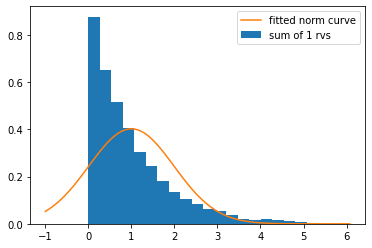

In [5]:
steps = 1
N = 10000

# Random number generator
rvs = dists["exp"](steps * N)
rvs = rvs.reshape(steps, N)
rvs = np.sum(rvs, axis=0)

bins = np.linspace(np.percentile(rvs, 0.5), np.percentile(rvs, 99.5), 20)
plt.hist(rvs, bins=bins, density=True, label=f"sum of {steps} rvs")
# Fit the distribution and plot
fitted_par = stats.norm.fit(rvs)
x = np.linspace(np.percentile(rvs, 0.5) - 1, np.percentile(rvs, 99.5) + 1, 100)
plt.plot(x, stats.norm(*fitted_par).pdf(x), label="fitted norm curve")
plt.legend()
plt.show()

# Generalized Central Limit Theorem

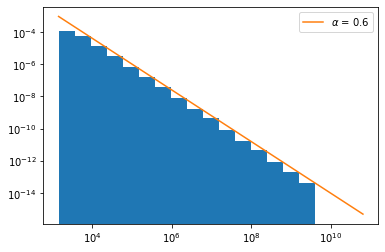

In [12]:
steps = 100
N = 10000
alpha = 0.6

rvs = dists["parto"](alpha, steps * N)
rvs = rvs.reshape(steps, N)
rvs = np.sum(rvs, axis=0)

bins = np.logspace(np.log10(np.percentile(np.abs(rvs), 2.5)),
                   np.log10(np.percentile(np.abs(rvs), 100)), 20)

plt.hist(np.abs(rvs), bins=bins, density=True)
plt.plot(bins, 100 / (bins ** (1 + alpha)), label=r"$\alpha$ = {0}".format(alpha))
plt.legend()
plt.xscale('log')
plt.yscale('log')